Here's the code for analyzing listings!

In [ ]:
import pandas
from plotnine import *
import parse
import datetime
import warnings

warnings.filterwarnings('ignore')

In [5]:
listings = parse.Listings()
df = listings.fetch_data()
df = df[df['Date'] != 'TBA']
df = df[df['Date'] >= datetime.date.today().strftime('%Y-%m-%d')]

listing_df = df

Checking CoinMarketCap
Page: 1
Page: 2
Checking NFTReminder
Checking Rarity Sniper
Checking UpcomingNFT.net
Checking NearingNFT.net
Checking Crypto.com
Checking mintyscore.com
Checking rarity.tools
Checking seafloor.io
Checking nfteller.io
Checking icy.tools
Checking nftsolana.io
Checking nextdrop.is
Checking nextdrop.com
Checking oxalus.io


The following code block is going to show you a column plot with the most popular listings.

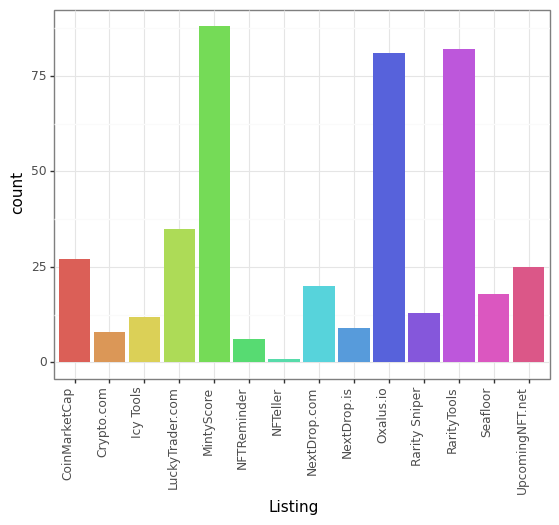

<ggplot: (8748146981144)>

In [8]:
(ggplot(listing_df, aes(x='Listing', fill='Listing')) + 
 geom_bar() + 
 theme_bw() +
 theme(axis_text_x=element_text(angle=90, hjust=1), 
       legend_position="none"))

The following code block is going to print top 10 the most listed collections

In [9]:
listed_df = df.groupby('Collection').size().reset_index(name='counts')
top10 = listed_df.sort_values('counts', ascending=False).head(10)

#add all the information for the top 10 collections from df
top10 = top10.merge(df, on='Collection', how='left').drop_duplicates(subset='Collection', keep='first')
#print top10
for index, row in top10.iterrows():
    print("Collection: " + row['Collection'] + " (Listed " +  str(row['counts']) + ")")
    print("Date: " + row['Date'])
    print("Mint: " + str(row['Price']) + " at " + row['Platform'])
    print("Twitter: " + row['Twitter'] + "\n")

Collection: Genesis Dori (Listed 7)
Date: 2023-03-17 12:00:00
Mint: 0.025 at Ethereum
Twitter: https://twitter.com/DoriGenesis

Collection: BIRDYBITES (Listed 6)
Date: 2023-03-19 01:00:00
Mint: 0.044 at Ethereum
Twitter: https://twitter.com/BIRDYBITES_

Collection: Paddy's Odyssey (Listed 6)
Date: 2023-03-18 04:00:00
Mint: 0.1 at Ethereum
Twitter: https://twitter.com/Paddys_Odyssey

Collection: Grumbies Eternal Entry (Listed 6)
Date: 2023-03-24 01:00:00
Mint: 0.04 at Ethereum
Twitter: https://twitter.com/grumbiesnft

Collection: JOKER CLUB (Listed 6)
Date: 2023-03-24 04:42:00
Mint: 0.08 at Ethereum
Twitter: https://twitter.com/JokerClubSpirit

Collection: SatoshiSaga (Listed 5)
Date: 2023-03-19 17:00:00
Mint: 0.09 at Ethereum
Twitter: https://twitter.com/SatoshiSaga

Collection: HIMALAYA (Listed 5)
Date: 2023-03-22 08:00:00
Mint: 0.019 at Ethereum
Twitter: https://twitter.com/Himalaya_inc

Collection: WoofPack NFT (Listed 5)
Date: 2023-03-24 02:00:00
Mint: 0.05 at Ethereum
Twitter: htt

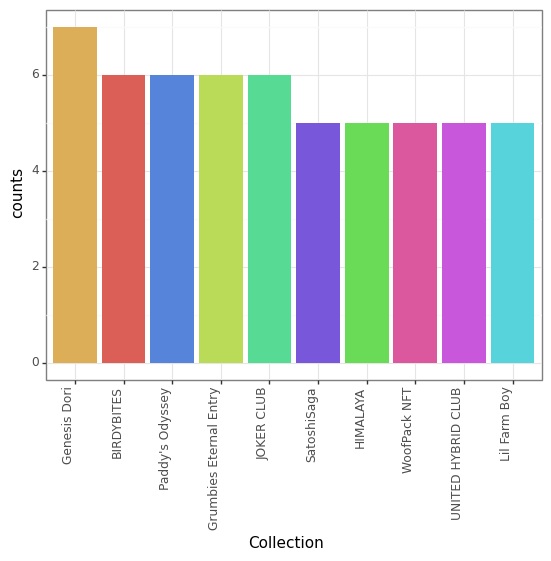

<ggplot: (8748146962706)>

In [10]:
(ggplot(top10, aes(x='Collection', y='counts', fill='Collection')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=top10.sort_values('counts', ascending=False)['Collection']))

Preparing the dataset with mint dates

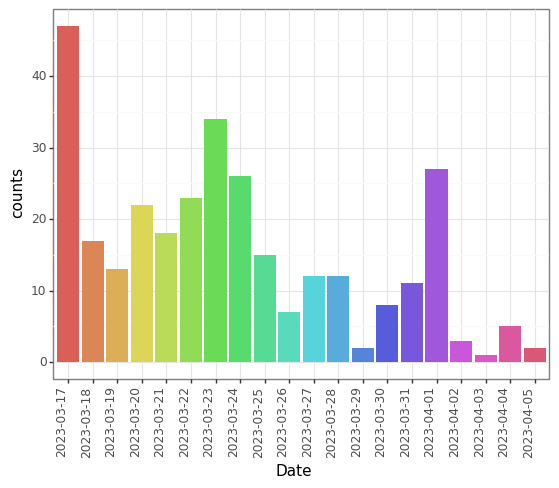

<ggplot: (8748146735507)>

In [13]:
mint_days_df = df
mint_days_df = mint_days_df[mint_days_df.Date != 'TBA']
#Convert Date to datetime
mint_days_df['Date'] = pandas.to_datetime(mint_days_df['Date'])
mint_days_df['Date'] = mint_days_df['Date'].dt.strftime('%Y-%m-%d')

#group by date and count
popular_mint_days = mint_days_df.groupby('Date').size().reset_index(name='counts')
popular_mint_days = popular_mint_days.sort_values('Date', ascending=True)
popular_mint_days = popular_mint_days[popular_mint_days['Date'] >= datetime.datetime.today().strftime('%Y-%m-%d')]

#Plotting the the next 20 popular mint days
(ggplot(popular_mint_days.head(20), aes(x='Date', y='counts', fill='Date')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=popular_mint_days.head(20)['Date']))

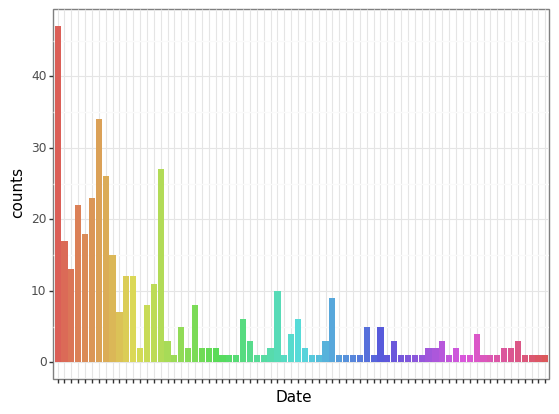

<ggplot: (8748147149101)>

In [14]:
#Getting the total view of the upcoming mint days
(ggplot(popular_mint_days, aes(x='Date', y='counts', fill='Date')) +
    geom_bar(stat='identity') +
    theme_bw() +
    #remove x axis labels
    theme(axis_text_x=element_blank(),
          legend_position="none") +
    scale_x_discrete(limits=popular_mint_days['Date']))